<a href="https://colab.research.google.com/github/elfkr7/Python-Data-Process-Algorithms/blob/main/GradientBoosting%26Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Classification with Gradient Boosting***

In [292]:
import pandas as pd
import numpy as np
import sklearn as sk

In [293]:
df=pd.DataFrame(pd.read_csv("churn.csv"))
pd.set_option('display.max_columns', None)
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [294]:
df.describe(include=object)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [295]:
df.info()
#We have some data type issues here. For ex, total charges could be float64 or seniorcitizen can be data type of "category".


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [296]:
#assign dtypes of categorical variables as category
df.gender=df.gender.astype("category")
df.SeniorCitizen =df.SeniorCitizen.astype("category")
df.Partner=df.Partner.astype("category")
df.Dependents=df.Dependents.astype("category")
df.PhoneService=df.PhoneService.astype("category")
df.MultipleLines=df.MultipleLines.astype("category")
df.OnlineBackup=df.OnlineBackup.astype("category")
df.OnlineSecurity=df.OnlineSecurity.astype("category")
df.DeviceProtection=df.DeviceProtection.astype("category")
df.TechSupport=df.TechSupport.astype("category")
df.StreamingTV=df.StreamingTV.astype("category")
df.StreamingMovies=df.StreamingMovies.astype("category")
df.Contract=df.Contract.astype("category")
df.PaperlessBilling=df.PaperlessBilling.astype("category")
df.PaymentMethod=df.PaymentMethod.astype("category")
df.Churn=df.Churn.astype("category")
df.InternetService=df.InternetService.astype("category")

In [297]:
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')


In [298]:
df.info()
#There is null-value problem in the column of TotalCharges for 11 observation. It needs data imputation. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [300]:
df=df.dropna(axis=0)


In [301]:
df.describe()
#It seems even though montlyh charges have values for those specific 11 rows, the total charges are empty. Since the number of the observations with nan values are small, they can be deleted.

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


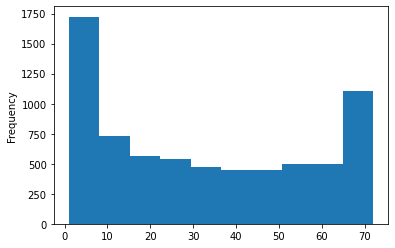

In [302]:
df["tenure"].plot(kind="hist")

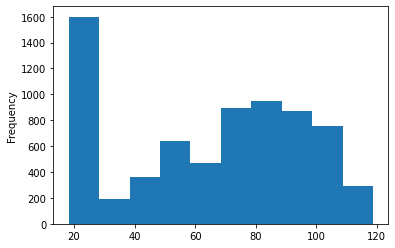

In [303]:
df["MonthlyCharges"].plot(kind="hist")

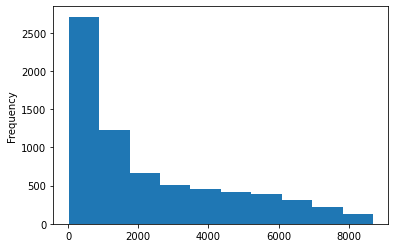

In [304]:
df["TotalCharges"].plot(kind="hist")

In [305]:
#It would be a good idea to flag customers whose tenure is shorter than 1. Since tenure is one of the most relevant feature for churn. IT could be expected that the situation may be completely different for people tenure is smaller than 1 than the rest.
print(df[df.tenure <= 1].shape[0])

613


In [306]:
#Create new feature.
df['is_tenure_smaller_1'] = np.where(df['tenure']<= 1 , 'Yes', 'No')
df.is_tenure_smaller_1=df.is_tenure_smaller_1.astype('category')


In [307]:
#reorder the columns
col_list=df.columns.to_list()
col_list=col_list[0:len(col_list)-2]+[col_list[len(col_list)-1]]+[col_list[len(col_list)-2]]
col_list
df=df[col_list]
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'is_tenure_smaller_1', 'Churn'],
      dtype='object')

In [308]:
#drop customerID
df=df[col_list[1:len(col_list)]]

In [310]:
df['TotalCharges'].quantile(0.95)

6923.589999999999

In [311]:
#Since the standard deviation is super high for TotalCharges, winsorizing method could be sensible to handle outliers in the right tail of the distribution.
from scipy.stats.mstats import winsorize
df['TotalCharges'] = winsorize(df['TotalCharges'], limits=(0, 0.05))

In [312]:
#get the list of the columns name of category
cat_cols = list(df.select_dtypes(include=['category']).columns)
cat_cols=cat_cols[0:len(cat_cols)]
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'is_tenure_smaller_1',
 'Churn']

In [313]:
for i in cat_cols:
  print(pd.crosstab(df[i],columns="freq"))

col_0   freq
gender      
Female  3483
Male    3549
col_0          freq
SeniorCitizen      
0              5890
1              1142
col_0    freq
Partner      
No       3639
Yes      3393
col_0       freq
Dependents      
No          4933
Yes         2099
col_0         freq
PhoneService      
No             680
Yes           6352
col_0             freq
MultipleLines         
No                3385
No phone service   680
Yes               2967
col_0            freq
InternetService      
DSL              2416
Fiber optic      3096
No               1520
col_0                freq
OnlineSecurity           
No                   3497
No internet service  1520
Yes                  2015
col_0                freq
OnlineBackup             
No                   3087
No internet service  1520
Yes                  2425
col_0                freq
DeviceProtection         
No                   3094
No internet service  1520
Yes                  2418
col_0                freq
TechSupport              
N

**Number of churn is 1869 whereas the number of non-churn is 5174. Imbalance data problem. **

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               7032 non-null   category
 1   SeniorCitizen        7032 non-null   category
 2   Partner              7032 non-null   category
 3   Dependents           7032 non-null   category
 4   tenure               7032 non-null   int64   
 5   PhoneService         7032 non-null   category
 6   MultipleLines        7032 non-null   category
 7   InternetService      7032 non-null   category
 8   OnlineSecurity       7032 non-null   category
 9   OnlineBackup         7032 non-null   category
 10  DeviceProtection     7032 non-null   category
 11  TechSupport          7032 non-null   category
 12  StreamingTV          7032 non-null   category
 13  StreamingMovies      7032 non-null   category
 14  Contract             7032 non-null   category
 15  PaperlessBilling     

In [315]:
#check missing data
df.isnull().sum()
#no null value in the updated data.

gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
is_tenure_smaller_1    0
Churn                  0
dtype: int64

In [316]:
#apply oversampling up to 0.8 of majority
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy="minority")
X_over, y_over = oversample.fit_resample(df.iloc[:,0:df.shape[1]-1], df["Churn"]) 

In [317]:
pd.crosstab(y_over,columns="freq")

col_0,freq
Churn,
No,5163
Yes,5163


In [318]:
from re import X
#split the data into train and test parts
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.33, random_state=1923)

In [319]:
#check the dims of train and test parts
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6918, 20)
(3408, 20)
(6918,)
(3408,)


In [320]:
import lightgbm
print(lightgbm.__version__)

2.2.3


In [321]:
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

In [330]:
model = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1923)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.median(n_scores), np.std(n_scores)))
# fit the model on the whole dataset
model.fit(X_train, y_train)

Accuracy: 0.818 (0.016)


LGBMClassifier()

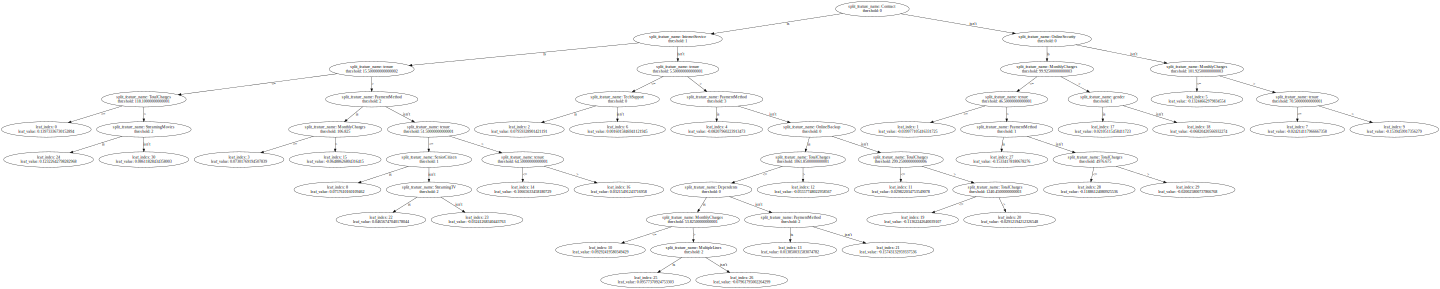

In [337]:
graph = lightgbm.create_tree_digraph(model, tree_index=3, name='Tree3' )
graph.graph_attr.update(size="20,20")
graph

In [323]:
#prediction
yhat = model.predict(X_test)
confusion_matrix = pd.crosstab(y_test, yhat,
                                   rownames=['Actual'],
                                   colnames=['Predicted'])
confusion_matrix

Predicted,No,Yes
Actual,,
No,1315,388
Yes,220,1485


In [324]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, yhat))

Accuracy: 0.8215962441314554


In [326]:
from sklearn.metrics import precision_score
print("Precision of churn:",precision_score(y_test,yhat,pos_label="Yes"))
print("Precision of non-churn:",precision_score(y_test,yhat,pos_label="No"))

Precision of churn: 0.792845702082221
Precision of non-churn: 0.8566775244299675


In [327]:
from sklearn.metrics import recall_score
print("Recall of churn:",recall_score(y_test,yhat,pos_label="Yes"))
print("Recall of non-churn:",recall_score(y_test,yhat,pos_label="No"))

Recall of churn: 0.8709677419354839
Recall of non-churn: 0.7721667645331768


***Clustering***

In [345]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import preprocessing

In [341]:
#remove target from data and transform categorical variables into vectors via one-hot-encoding
df_cluster=df[col_list[1:len(col_list)-1]]
df_cluster = pd.get_dummies(df, columns=cat_cols)

In [343]:
df_cluster.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,is_tenure_smaller_1_No,is_tenure_smaller_1_Yes,Churn_No,Churn_Yes
0,1,29.85,29.85,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0
1,34,56.95,1889.50,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0
2,2,53.85,108.15,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1
3,45,42.30,1840.75,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0
4,2,70.70,151.65,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1


In [346]:
#preprocessing before clustering since it's vulnerable to outliers the way more than tree based clasification is
scaler = preprocessing.MinMaxScaler()
df_cluster[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(df_cluster[['tenure','MonthlyCharges','TotalCharges']])

In [347]:
#KMeans Clustering
kmeans = KMeans(2)
clusters = kmeans.fit_predict(df_cluster)
labels = pd.DataFrame(clusters)
labeled_customers = pd.concat((df,labels),axis=1)
labeled_customers = labeled_customers.rename({0:'labels'},axis=1)

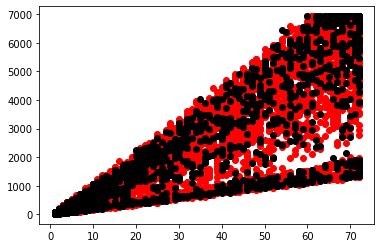

In [369]:
#visualize the clusters
label0 = labeled_customers[labeled_customers["labels"] == 0]
label1 = labeled_customers[labeled_customers["labels"] == 1]
 
#Plot the results
plt.scatter(label0["tenure"] , label0["TotalCharges"] , color = 'red')
plt.scatter(label1["tenure"] , label1["TotalCharges"] , color = 'black')
plt.show()